<a href="https://colab.research.google.com/github/mzaoualim/UpWork_Proposals/blob/main/Machine_learning/facial_feature_analysis/facial_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

Developing a jaw-strength classification model following these steps:
1. **Face Detection:**
   - **MediaPipe** is a good choice for face detection as it provides robust facial landmark detection. You can use it to crop the face from the image effectively.
   - Ensure that the preprocessing step includes normalization of the image size and possibly converting it to grayscale if color information is not necessary for your task.

2. **Classify Faces into Male, Female:**
   - You can use pre-trained models for gender classification, such as those available in libraries like TensorFlow or PyTorch. Fine-tuning these models on your specific dataset can improve accuracy.
   - Consider the ethical implications and potential biases in gender classification models, and ensure your dataset is diverse and representative.

3. **Measure Jaw Length Ratio to Face Length:**
   - Use the facial landmarks detected by MediaPipe to calculate the jaw length and face length. You can define specific points on the jawline and face to measure these distances.
   - Consider using geometric transformations to account for variations in pose and angle, ensuring consistent measurements.

4. **Domain Knowledge Table for Jaw Classification:**
   - Develop a table based on domain knowledge or literature that categorizes jaw ratios into strong, moderate/average, or weak/receding. This table should be validated with expert input if possible.
   - Consider using machine learning models to learn these classifications from labeled data, which might provide more flexibility and accuracy than a static table.

**Additional Considerations:**
- **Data Augmentation:** To handle variations in facial angles and poses, use data augmentation techniques to artificially expand your dataset.
- **Evaluation:** Ensure you have a robust evaluation strategy, including a diverse test set to validate the model's performance across different demographics and conditions.
- **Ethical Considerations:** Be mindful of privacy and consent when using facial images, and consider the ethical implications of classifying physical features.



# Step 1: Face Detection

In [1]:
# Import libraries

# !pip install --upgrade --force-reinstall "numpy<2" "pandas<2"
!pip install --q mediapipe
!pip install --q cvlib

import requests
import mediapipe as mp
import cv2
import cvlib as cv
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

array([[[103, 127, 139],
        [102, 126, 138],
        [ 97, 121, 134],
        ...,
        [122, 120, 111],
        [128, 124, 113],
        [133, 127, 114]],

       [[112, 136, 148],
        [ 94, 118, 130],
        [ 86, 110, 123],
        ...,
        [117, 116, 108],
        [125, 121, 111],
        [129, 125, 113]],

       [[108, 132, 144],
        [ 84, 108, 120],
        [ 75,  99, 112],
        ...,
        [114, 113, 106],
        [121, 118, 109],
        [125, 122, 110]],

       ...,

       [[ 55,  81, 111],
        [ 61,  87, 117],
        [ 67,  93, 122],
        ...,
        [ 89, 100, 109],
        [ 80,  90,  97],
        [ 66,  75,  79]],

       [[ 58,  84, 114],
        [ 65,  91, 121],
        [ 66,  92, 121],
        ...,
        [ 87,  98, 106],
        [ 79,  89,  95],
        [ 67,  76,  81]],

       [[ 62,  88, 118],
        [ 66,  92, 122],
        [ 63,  89, 118],
        ...,
        [ 85,  96, 104],
        [ 78,  88,  95],
        [ 70,  79,  83]]], dtype=uint8)
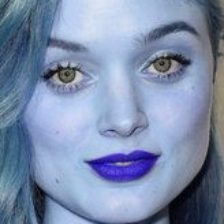

In [3]:
# Face Detection

## Initialize MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def detect_and_crop_face(image):
  with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = image.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                face = image[y:y+h, x:x+w]
                return cv2.resize(face, (224, 224))  # Standardize size
  return None

# Example usage
image = cv2.imread('/content/img.jpg')
face = detect_and_crop_face(image)
face

# Classify Faces into Male, Female

In [4]:
# Download the model file
url = "https://huggingface.co/spaces/VictorPanther/SSI_Gender_Detection/resolve/main/gender_detection.h5"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses

with open("gender_detection.h5", "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [28]:
# Gender Classification

# Load a pre-trained gender classification model
gender_model = load_model('/content/gender_detection.h5')

def classify_gender(face_image):
    # Resize the image to the expected input shape of the model (96, 96)
    face_image = cv2.resize(face_image, (96, 96))
    face_image = face_image / 255.0  # Normalize
    face_image = np.expand_dims(face_image, axis=0)  # Add batch dimension
    prediction = gender_model.predict(face_image)
    return 'Male' if prediction[0][0] > 0.5 else 'Female'

# Example usage
gender = classify_gender(face)
gender

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


'Female'

# Measure Jaw Length Ratio to Face Length

In [33]:
# Measure Jaw Length Ratio

def jaw_ratio(face_image):
    # Use MediaPipe to get facial landmarks
    with mp.solutions.face_mesh.FaceMesh(static_image_mode=True) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # Example: Calculate jaw length and face length using landmarks
                landmarks = face_landmarks.landmark

            # jaw length
            jaw_points = [(landmarks[i].x, landmarks[i].y) for i in range(0, 17)]
            left_jaw = jaw_points[0]
            right_jaw = jaw_points[16]

            jaw_length = np.linalg.norm(np.array(left_jaw) - np.array(right_jaw))

            # face length
            left_eye = landmarks[10]
            right_eye = landmarks[338]
            chin = landmarks[152]

            ## Calculate midpoint of eyes
            eye_midpoint_x = (left_eye.x + right_eye.x) / 2
            eye_midpoint_y = (left_eye.y + right_eye.y) / 2

            ## Calculate face length
            face_length = np.linalg.norm(np.array([eye_midpoint_x, eye_midpoint_y]) - np.array([chin.x, chin.y]))

            return jaw_length / face_length
    return None, None


# Example usage
jaw_ratio = jaw_ratio(face)
jaw_ratio

# Domain Knowledge Table for Jaw Classification

In [35]:
# Jaw Strength classification

## Domain Knowledge Table for Jaw Classification
range_dict = {
    'Male':
    {'Strong': (0.45, 0.55),
    'Average': (0.40, 0.50),
    'Weak': (0.35, 0.45)},
    'Female':
    {'Strong': (0.40, 0.50),
    'Average': (0.35, 0.45),
    'Weak': (0.30, 0.35)}
}

## Classify Jaw Strength
def classify_jaw_strength(gender, jaw_ratio):
  '''
  Jaw length / face length ratio: This ratio is calculated by dividing the jaw length by the face length. A higher ratio typically indicates a stronger jaw.
  '''
    for strength, (lower, upper) in range_dict[gender].items():
        if lower <= jaw_ratio <= upper:
            return strength
    return 'Unable to determine the Jaw Strength \n The computed Jaw ratio is located out of the domaine knowledge range\n'

# Example usage
jaw_strength = classify_jaw_strength(gender, jaw_ratio)
jaw_strength

# Wrapping up!

In [38]:
# Step 6: Putting it All Together

def process_image(image_path):
    image = cv2.imread(image_path)
    face = detect_and_crop_face(image)
    if face is not None:
        gender = classify_gender(face)
        calculated_jaw_ratio = jaw_ratio(face)
        jaw_strength = classify_jaw_strength(gender, calculated_jaw_ratio)
        return gender, jaw_strength
    return None, None

# Example usage
gender, jaw_strength = process_image('/content/img.jpg')
print(f"Gender: {gender},\nJaw Strength: {jaw_strength}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Gender: Female,
Jaw Strength: Unable to determine the Jaw Strength 
 The computed Jaw ratio is located out of the domaine knowledge range



# Additionnal Steps

In [39]:
# requirements.txt generator  for streamlit web app
!pip freeze > requirements.txt